print("hello world")

In [113]:
import pandas as pd
df = pd.read_excel("数据1.xls",header=2)
print(df.head())#打印读取到的数据
print("--------------------------")
#print(df.info())#打印DataFrame的结构信息,每一列

                       指标    2024年    2023年    2022年     2021年     2020年  \
0      研究与试验发展人员全时当量(万人年)    774.5    724.1    635.4    571.60    523.45   
1  研究与试验发展基础研究人员全时当量(万人年)      NaN     57.5     50.9     47.20     42.68   
2  研究与试验发展应用研究人员全时当量(万人年)      NaN     77.7     74.1     69.10     64.31   
3  研究与试验发展试验发展人员全时当量(万人年)      NaN    588.9    510.3    455.30    416.46   
4         研究与试验发展经费支出(亿元)  36130.0  33357.1  30782.9  27956.31  24393.11   

      2019年     2018年     2017年     2016年     2015年  
0    480.08    438.14    403.36    387.81    375.88  
1     39.20     30.50     29.01     27.47     25.32  
2     61.54     53.88     48.96     43.89     43.04  
3    379.37    353.77    325.39    316.44    307.53  
4  22143.60  19677.93  17606.13  15676.75  14169.88  
--------------------------


In [114]:
# 列出指标这一列的数据
#print(df['指标'])
print(df['指标'].values)

['研究与试验发展人员全时当量(万人年)' '研究与试验发展基础研究人员全时当量(万人年)' '研究与试验发展应用研究人员全时当量(万人年)'
 '研究与试验发展试验发展人员全时当量(万人年)' '研究与试验发展经费支出(亿元)' '研究与试验发展基础研究经费支出(亿元)'
 '研究与试验发展应用研究经费支出(亿元)' '研究与试验发展试验发展经费支出(亿元)' '研究与试验发展政府资金经费支出(亿元)'
 '研究与试验发展企业资金经费支出(亿元)' '发表科技论文(万篇)' '出版科技著作(种)' '科技成果登记数(项)' '国家技术发明奖(项)'
 '国家科学技术进步奖(项)' '专利申请数(项)' '发明专利申请数(项)' '专利申请授权数(项)' '发明专利申请授权数(项)'
 '高技术产品进出口额(亿美元)' '高技术产品出口额(亿美元)' '高技术产品进口额(亿美元)' '技术市场成交额(亿元)'
 '注：1.科技活动人员指标自2009年起废止。' '\u3000\u3000\u30002.科学家和工程师人员指标自2009年起废止。'
 '\u3000\u3000\u30003.科技经费筹集额指标自2009年起废止。'
 '\u3000\u3000\u30004.来源于政府资金的科技经费筹集额指标自2009年起废止。'
 '\u3000\u3000\u30005.来源于企业资金的科技经费筹集额指标自2009年起废止。'
 '\u3000\u3000\u30006.来源于金融机构贷款的科技经费筹集额指标自2009年起废止。'
 '\u3000\u3000\u30007.科技经费内部支出指标自2009年起废止。'
 '\u3000\u3000\u30008.科技活动人员、科学家和工程师人员经费筹集额、内部支出数据自2009年起废止。'
 '\u3000\u3000\u30009.2017年以前为专利申请受理数。' '数据来源：国家统计局']


In [115]:
# 从df中筛选出某些"指标"的数据，并把每年的数据整理成时间序列
def get_time_series(df, indicators):
    #按指标过滤行
    mask = df['指标'].isin(indicators)#判断indicators是否在指标中返回一个布尔序列
    #print(mask)
    sub_df = df[mask].copy()#保留指标这一列中mask中为True的行
    #print(sub_df[0:3])

    #把指标这一列变成表格的行名，去除一开始的数字索引
    sub_df.set_index('指标', inplace=True)
    #print(sub_df[0:3])
    '''
                          2024年    2023年    2022年     2021年     2020年     2019年  \
    指标                                                                            
    研究与试验发展人员全时当量(万人年)    774.5    724.1    635.4    571.60    523.45    480.08   
    研究与试验发展经费支出(亿元)     36130.0  33357.1  30782.9  27956.31  24393.11  22143.60   

    '''

    # 转置
    sub_df = sub_df.T
    #print(sub_df[0:3])
    '''
    指标     研究与试验发展人员全时当量(万人年)  研究与试验发展经费支出(亿元)
    2024年               774.5          36130.0
    2023年               724.1          33357.1
    2022年               635.4          30782.9    
    '''

    #时间从最近到之前，反转为从之前到现在
    sub_df = sub_df.iloc[::-1] 
    #print(sub_df[0:3])

    '''
    指标     研究与试验发展人员全时当量(万人年)  研究与试验发展经费支出(亿元)
    2015年              375.88         14169.88
    2016年              387.81         15676.75
    2017年              403.36         17606.13
    '''
    return sub_df

# 定义要输入的indicators
input_indicators = ['研究与试验发展经费支出(亿元)', '研究与试验发展人员全时当量(万人年)']
structure_indicators = ['研究与试验发展基础研究经费支出(亿元)', '研究与试验发展应用研究经费支出(亿元)', '研究与试验发展试验发展经费支出(亿元)','研究与试验发展政府资金经费支出(亿元)','研究与试验发展企业资金经费支出(亿元)']
output_indicators = ['发表科技论文(万篇)',
                     '出版科技著作(种)',
                     '科技成果登记数(项)',
                     '专利申请数(项)',
                     '发明专利申请数(项)', 
                     '专利申请授权数(项)',
                     '发明专利申请授权数(项)',
                     '国家技术发明奖(项)',
                     '国家科学技术进步奖(项)'
                     ]

#提取数据
df_input = get_time_series(df, input_indicators)
df_structure = get_time_series(df, structure_indicators)
df_output = get_time_series(df, output_indicators)

#print(df_input.index.str.replace('年',' ').astype(int))#把年去掉并且转换类型为int
'''
Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int64')
'''

df_input.index = df_input.index.str.replace('年', '').astype(int)
df_structure.index = df_structure.index.str.replace('年', '').astype(int)
df_output.index = df_output.index.str.replace('年', '').astype(int)

#没有2024年的部分数据，去除
df_structure=df_structure[df_structure.index<=2023]
#查看前几行和后几行
print("Input Data Head:")
print(df_input.head())
print(df_input.tail())

print("\nStructure Data Head:")
print(df_structure.head())
print(df_structure.tail())

print("\nOutput Data Head:")
print(df_output.head())
print(df_output.tail())

Input Data Head:
指标    研究与试验发展人员全时当量(万人年)  研究与试验发展经费支出(亿元)
2015              375.88         14169.88
2016              387.81         15676.75
2017              403.36         17606.13
2018              438.14         19677.93
2019              480.08         22143.60
指标    研究与试验发展人员全时当量(万人年)  研究与试验发展经费支出(亿元)
2020              523.45         24393.11
2021              571.60         27956.31
2022              635.40         30782.90
2023              724.10         33357.10
2024              774.50         36130.00

Structure Data Head:
指标    研究与试验发展基础研究经费支出(亿元)  研究与试验发展应用研究经费支出(亿元)  研究与试验发展试验发展经费支出(亿元)  \
2015               716.12              1528.64             11925.13   
2016               822.89              1610.49             13243.36   
2017               975.49              1849.21             14781.43   
2018              1090.37              2190.87             16396.69   
2019              1335.60              2498.50             18309.50   

指标    研究与试验发展政府资金经费支出(亿元)  研究与

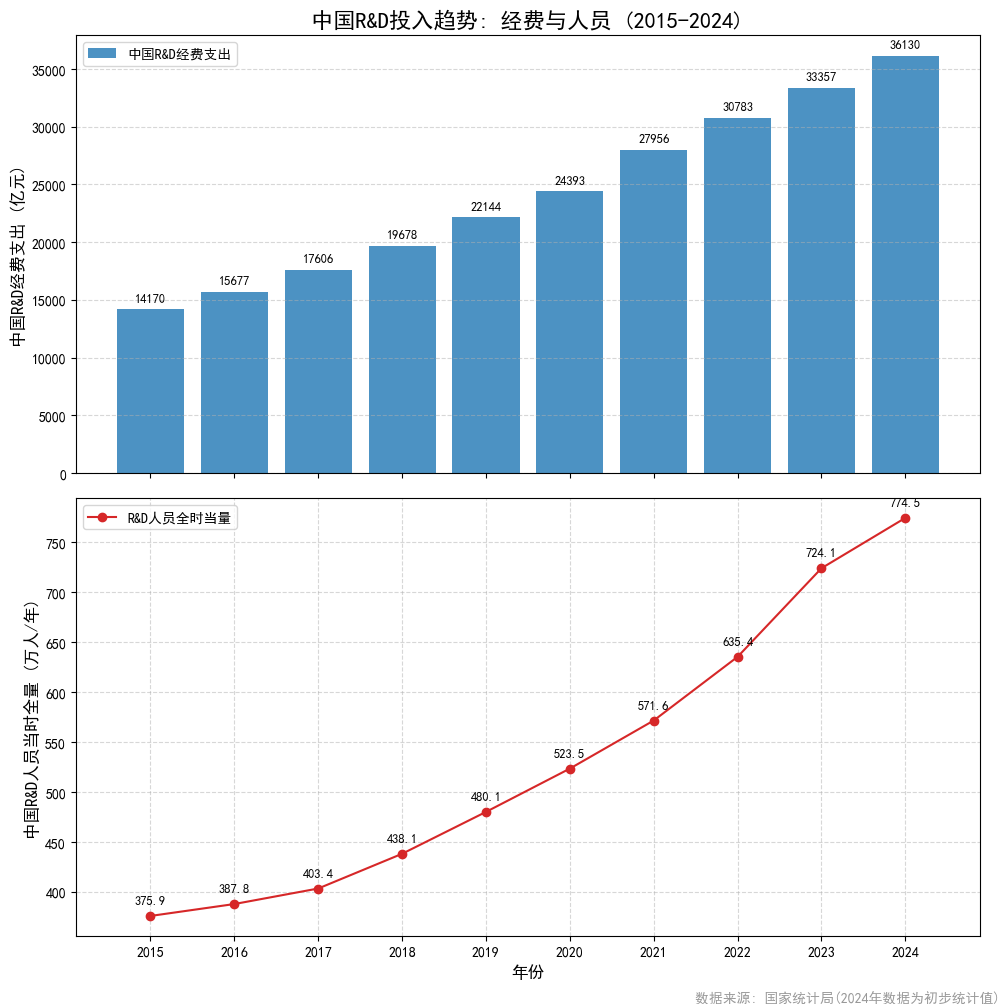

In [116]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题


# 数据
years_input = df_input.index
expenditure = df_input['研究与试验发展经费支出(亿元)']
personnel = df_input['研究与试验发展人员全时当量(万人年)']

# --- 图1: R&D 投入趋势 ---
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),sharex=True) #共享x轴

#子图1: 经费关系
ax1.bar(years_input,expenditure,color='#1f77b4',alpha=0.8,label='中国R&D经费支出')
ax1.set_ylabel('中国R&D经费支出 (亿元)',fontsize=12)
ax1.set_title("中国R&D投入趋势: 经费与人员 (2015-2024)",fontsize=16,fontweight='bold')
ax1.grid(axis='y',linestyle='--',alpha=0.5) #y轴方向画网格线，线条为虚线，透明度为50%
ax1.legend(loc='upper left') #显示图例放在左上角

#添加数值标签
for x,y in zip(years_input,expenditure):
    ax1.text(x,y+500,f'{y:.0f}',ha='center',va='bottom',fontsize=9)#水平居中，文字底部对齐

#子图2: 人员
ax2.plot(years_input,personnel,color='#d62728',marker='o',label='R&D人员全时当量')
ax2.set_xlabel('年份',fontsize=12) #x轴标识
ax2.set_ylabel('中国R&D人员当时全量 (万人/年)',fontsize=12)
ax2.grid(True,linestyle='--',alpha=0.5) #x和y轴都开启网格线
ax2.legend(loc='upper left')
ax2.set_xticks(years_input) #显示x轴的每一个坐标

#添加数值标签
for x,y in zip(years_input,personnel):
    ax2.text(x,y+10,f'{y:.1f}',ha='center',va='bottom',fontsize=9)

plt.tight_layout() #整个图自动紧密排版，避免子图之间的内容互相遮挡

#右下角添加数据来源
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(1,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)

plt.show()





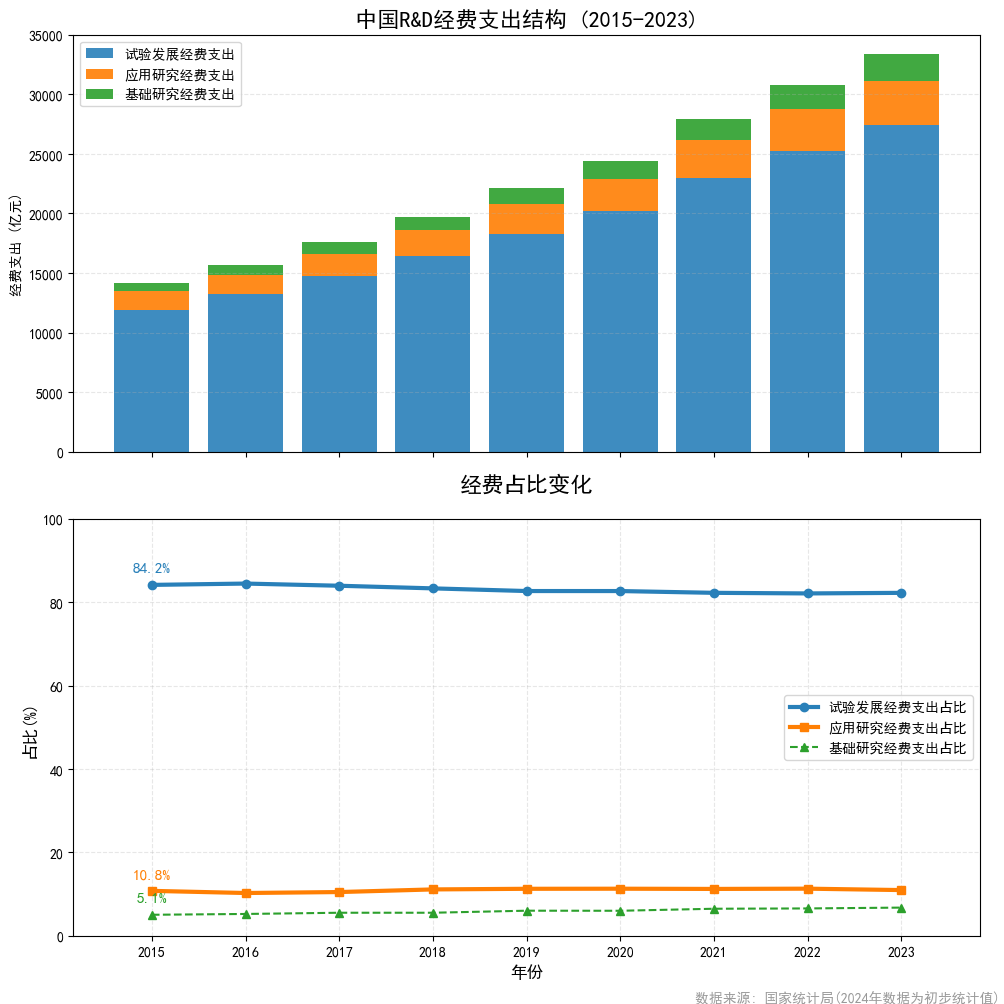

In [117]:
#数据处理
basic=df_structure['研究与试验发展基础研究经费支出(亿元)']
applied=df_structure['研究与试验发展应用研究经费支出(亿元)']
experimental=df_structure['研究与试验发展试验发展经费支出(亿元)']

#各自占比
ba_pct=(basic/expenditure)*100
ap_pct=(applied/expenditure)*100
ex_pct=(experimental/expenditure)*100


# --- 图 2 : R&D 结构 (堆叠柱状图) ---
fig2,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),sharex=True)

#子图1: 经费支出结构
ax1.bar(years_input[:-1],experimental,label='试验发展经费支出',color='#2980b9',alpha=0.9)
ax1.bar(years_input[:-1],applied,bottom=experimental,label="应用研究经费支出",color='#ff7f03',alpha=0.9)
ax1.bar(years_input[:-1],basic,bottom=experimental+applied,label="基础研究经费支出",color='#2ca02c',alpha=0.9)
ax1.set_title("中国R&D经费支出结构 (2015-2023)",fontsize=16,fontweight='bold')
ax1.set_ylabel("经费支出 (亿元)")
ax1.legend(loc="upper left")
ax1.grid(axis='y',linestyle='--',alpha=0.3)

#子图2: 
# --- 子图2 --- : 占比趋势折线图(展示地位变化)
ax2.plot(years_input[:-1],ex_pct[:-1],marker='o',linewidth=3,color='#2980b9',label='试验发展经费支出占比')
ax2.plot(years_input[:-1],ap_pct[:-1],marker='s',linewidth=3,color='#ff7f03',label='应用研究经费支出占比')
ax2.plot(years_input[:-1],ba_pct[:-1],marker='^',linewidth=1.5,linestyle='--',color='#2ca02c',label='基础研究经费支出占比')
ax2.set_title("经费占比变化",fontsize=16,fontweight='bold',pad=20)
ax2.set_ylabel("占比(%)",fontsize=12)
ax2.set_xlabel("年份",fontsize=12)
ax2.set_xticks(years_input[:-1])
ax2.set_ylim(0,100) #固定y轴为0-100
ax2.legend(loc='center right') # 图例放右边避免遮挡线条
ax2.grid(True,linestyle='--',alpha=0.3)

# 添加关键数据标签 (只标头尾，保持清晰 Clarity)
for i in [0, -1]: # 第一个和最后一个点
    # 企业
        ax2.text(years_input[i], ex_pct.iloc[i] + 3, f'{ex_pct.iloc[i]:.1f}%', 
                 color='#2980b9', ha='center', fontweight='bold', fontsize=11)
    # 政府
        ax2.text(years_input[i], ap_pct.iloc[i] +3, f'{ap_pct.iloc[i]:.1f}%', 
                 color='#ff7f03', ha='center', fontweight='bold', fontsize=11)
    # 其他
        ax2.text(years_input[i], ba_pct.iloc[i] +3, f'{ba_pct.iloc[i]:.1f}%', 
                 color='#2ca02c', ha='center', fontweight='bold', fontsize=11)
plt.tight_layout()

#右下角添加数据来源
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(1,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)
plt.show()


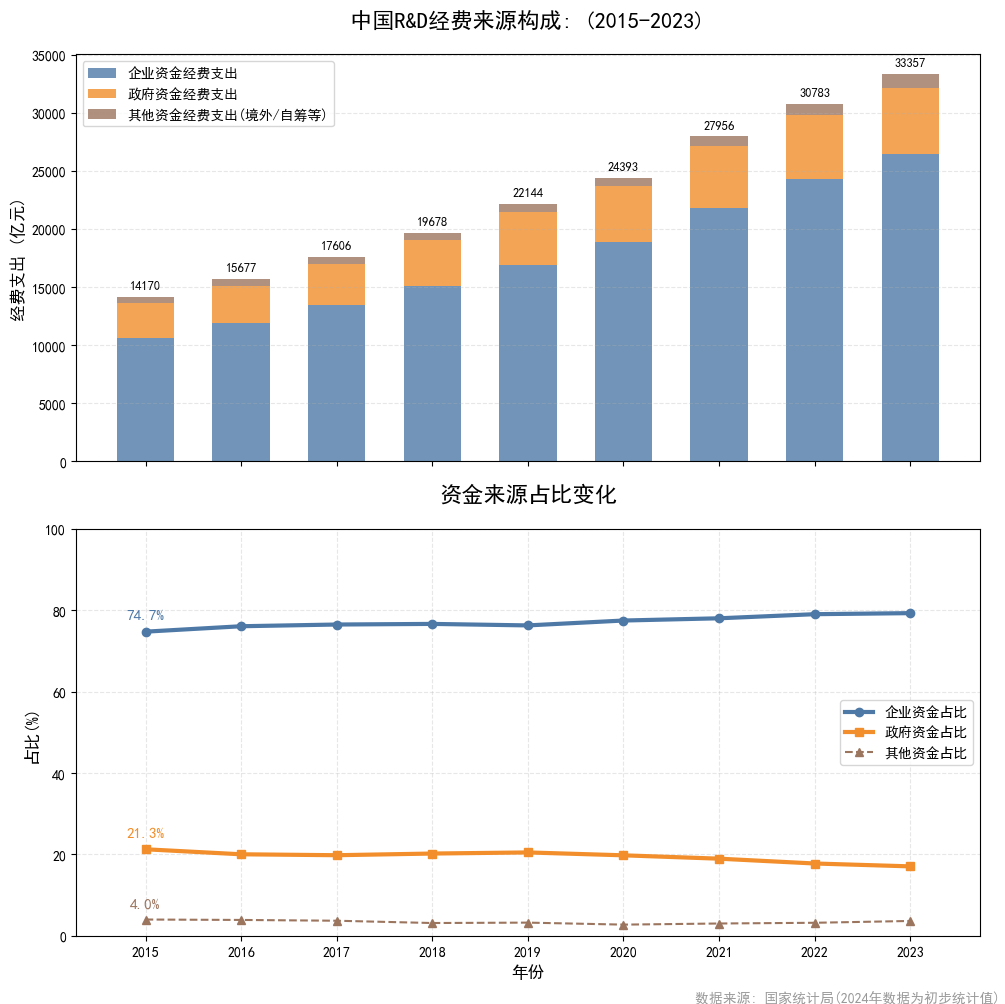

In [118]:
#--- 图3 (政府和企业投入经费对比图) ---
#数据处理
government=df_structure['研究与试验发展政府资金经费支出(亿元)']
enterprise=df_structure['研究与试验发展企业资金经费支出(亿元)']
other=expenditure-government-enterprise #其他资金
other=other[:-1] #2015-2023
#计算占比 (%)
gov_pct=(government/expenditure)*100
ent_pct=(enterprise/expenditure)*100
other_pct=(other/expenditure)*100

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),sharex=True)
colors = ['#4E79A7', '#F28E2B', '#9C755F']



#--- 子图1: 绝对值堆叠柱状图(展示体量与增长) ---
ax1.bar(years_input[:-1],enterprise,label="企业资金经费支出",color=colors[0],width=0.6,alpha=0.8)
ax1.bar(years_input[:-1],government,bottom=enterprise,label="政府资金经费支出",color=colors[1],width=0.6,alpha=0.8)
ax1.bar(years_input[:-1],other,bottom=enterprise+government,label="其他资金经费支出(境外/自筹等)",color=colors[2],width=0.6,alpha=0.8)

ax1.set_title("中国R&D经费来源构成: (2015-2023)",fontsize=16,fontweight='bold',pad=20)
ax1.set_ylabel("经费支出 (亿元)",fontsize=12)
ax1.legend(loc="upper left")
ax1.grid(axis='y',linestyle='--',alpha=0.3)

#在顶部添加数值
for x,y in zip(years_input,expenditure[:-1]):
    ax1.text(x,y+500,f'{y:0.0f}',ha='center',va='bottom',fontsize=9)

# --- 子图2 --- : 占比趋势折线图(展示地位变化)
ax2.plot(years_input[:-1],ent_pct[:-1],marker='o',linewidth=3,color=colors[0],label='企业资金占比')
ax2.plot(years_input[:-1],gov_pct[:-1],marker='s',linewidth=3,color=colors[1],label='政府资金占比')
ax2.plot(years_input[:-1],other_pct[:-1],marker='^',linewidth=1.5,linestyle='--',color=colors[2],label='其他资金占比')
ax2.set_title("资金来源占比变化",fontsize=16,fontweight='bold',pad=20)
ax2.set_ylabel("占比(%)",fontsize=12)
ax2.set_xlabel("年份",fontsize=12)
ax2.set_xticks(years_input[:-1])
ax2.set_ylim(0,100) #固定y轴为0-100
ax2.legend(loc='center right') # 图例放右边避免遮挡线条
ax2.grid(True,linestyle='--',alpha=0.3)

# 添加关键数据标签 (只标头尾，保持清晰 Clarity)
for i in [0, -1]: # 第一个和最后一个点
    # 企业
        ax2.text(years_input[i], ent_pct.iloc[i] + 3, f'{ent_pct.iloc[i]:.1f}%', 
                 color=colors[0], ha='center', fontweight='bold', fontsize=11)
    # 政府
        ax2.text(years_input[i], gov_pct.iloc[i] +3, f'{gov_pct.iloc[i]:.1f}%', 
                 color=colors[1], ha='center', fontweight='bold', fontsize=11)
    # 其他
        ax2.text(years_input[i], other_pct.iloc[i] +3, f'{other_pct.iloc[i]:.1f}%', 
                 color=colors[2], ha='center', fontweight='bold', fontsize=11)

plt.tight_layout() #整个图自动紧密排版，避免子图之间的内容互相遮挡

#右下角添加数据来源
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(1,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)

plt.show()

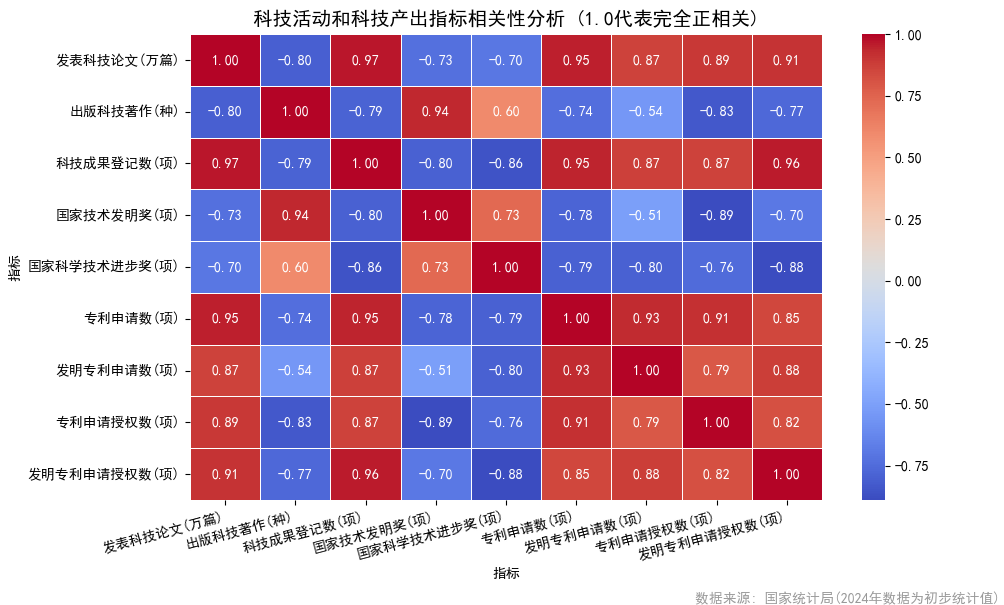

In [119]:
import seaborn as sns
import numpy as np
#提取数据
fig,ax=plt.subplots(figsize=(10,6))
#计算相关系数矩阵
corr_matrix=df_output.corr()
#子图1: 热力线性相关图
sns.heatmap(corr_matrix,
            annot=True, #格子中显示具体数值
            cmap='coolwarm',
            fmt='.2f',#保留两位小数
            linewidths=0.5,#格子之间的边线框
            ax=ax,
            annot_kws={"size":10})#格子内字体大小
ax.set_title("科技活动和科技产出指标相关性分析 (1.0代表完全正相关)",fontsize=14,fontweight="bold")
#旋转x轴标签以防重叠
plt.setp(ax.get_xticklabels(),rotation=15,ha="right")
plt.tight_layout()
#右下角添加数据来源
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(1,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)
plt.show()

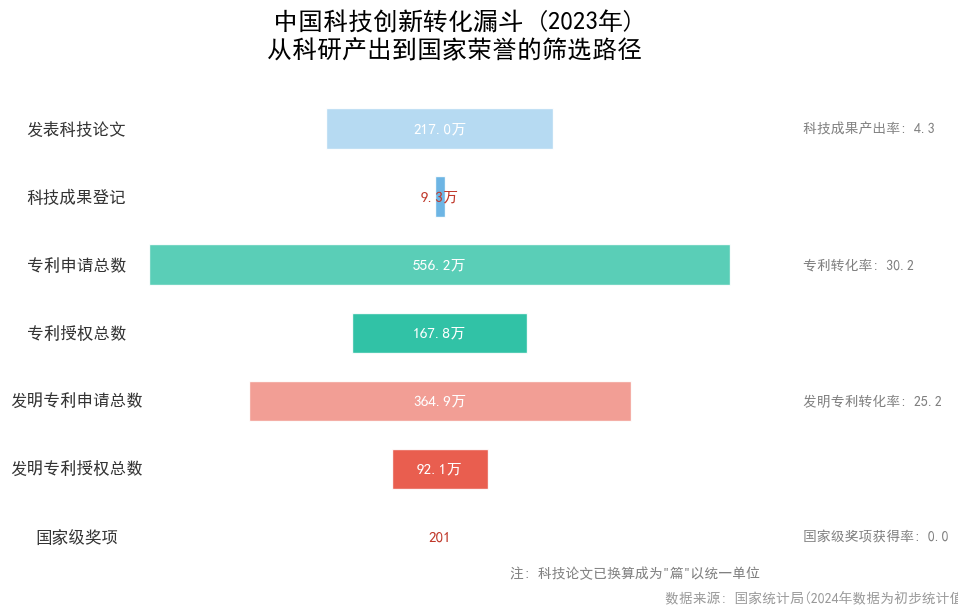

In [120]:
#子图2: 专利含金量""漏斗图"

#定义漏斗颜色(从冷色到暖色)
#颜色顺序: 浅蓝->深蓝->紫色->深紫->红->深红->金色
FUNNEL_COLORS=[
    '#AED6F1', # 论文 (海量)
    
    '#5DADE2', # 成果
    '#48C9B0', # 专利申请
    '#1ABC9C', # 发明申请 (核心)
    '#F1948A', # 专利授权
    '#E74C3C', # 发明授权 (通过)
    '#F1C40F'  # 国家奖项 (皇冠)
]
#准备漏洞数据
#关键处理1: 合并"国家奖项"
df_output['国家奖项(项)']=df_output['国家技术发明奖(项)']+df_output['国家科学技术进步奖(项)']
#关键处理2: 单位换算(万篇——>篇)
#必须统一单位，否则论文数(几百)和专利数(几百万)没办法画在一张图上
df_output['发表科技论文(篇)']=df_output['发表科技论文(万篇)']*10000

#定义漏洞的最终顺序
funnel_steps=[
    '发表科技论文(篇)', 
    '科技成果登记数(项)', 
    '专利申请数(项)', 
    '发明专利申请数(项)', 
    '专利申请授权数(项)', 
    '发明专利申请授权数(项)',
    '国家奖项(项)'
]
#简化显示的标签
step_labels=[
    '发表科技论文', 
    '科技成果登记', 
    '专利申请总数', 
    '专利授权总数',
    '发明专利申请总数', 
    '发明专利授权总数', 
    '国家级奖项'
]

fig,ax=plt.subplots(figsize=(10,6))
#绘制漏斗图
#倒序数据
y_pos=np.arange(len(funnel_steps))[::-1]
df_funnel=df_output[funnel_steps]
#print(df_funnel.iloc[8,:])#因为2024年有空白,所以我们选取2023年来进行说明
values=df_funnel.iloc[8,:].values

#计算居中绘图的参数
#让左边缘(left)等于-values/2,这样bat就会以x=0为中心
left_pos=-values/2

#绘制柱状图
bars=ax.barh(y_pos,values,left=left_pos,height=0.6,color=FUNNEL_COLORS,edgecolor='white',alpha=0.9)

#---装饰图表---
#隐藏坐标轴，只保留图形
ax.axis('off')

#添加标题
ax.set_title("中国科技创新转化漏斗 (2023年)\n从科研产出到国家荣誉的筛选路径",fontsize=18,fontweight="bold",pad=20)


#添加标签和数值
for bar,label,value in zip(bars,step_labels,values):
    #1.在左侧标注阶段名称
    ax.text(-np.max(values)/1.6, #文本的x坐标(向左偏移)
            bar.get_y()+bar.get_height()/2, #文本的y坐标(条形中间)
            label, #要显示的文字
            ha='center',#文本右边对准给定的x坐标
            va='center',#文字在条形高度中间
            fontsize=12,fontweight='bold',color='#333')
    
    #2.在中间标注: 具体数值
    # 格式化数值: 如果超过1万,用万作单位,否则直接显示
    text_color = 'white' if value > np.max(values) * 0.1 else '#C0392B' # 小数值用深红色高亮
    if value>10000:
        val_str=f"{value/10000:.1f}万"
    else:
        val_str=f"{int(value)}"
    ax.text(0,
            bar.get_y()+bar.get_height()/2,
            val_str,
            ha='center',
            va='center',
            fontsize=11,
            color=text_color)   
    
#3. 在右侧标注转化率 (相较于上一级的比例)
# 科技成果转化率
tech_rate=values[1]/values[0]*100
ax.text(np.max(values)/1.6,
                bars[0].get_y()+bars[0].get_height()/2,
                f"科技成果产出率: {tech_rate:.1f}",
                ha="left",
                va="center",
                fontsize=10,
                color="gray")

#专利转化率
pa_rate=values[3]/values[2]*100
ax.text(np.max(values)/1.6,
                bars[2].get_y()+bars[2].get_height()/2,
                f"专利转化率: {pa_rate:.1f}",
                ha="left",
                va="center",
                fontsize=10,
                color="gray")

#发明专利转化率
inpa_rate=values[5]/values[4]*100
ax.text(np.max(values)/1.6,
                bars[4].get_y()+bars[4].get_height()/2,
                f"发明专利转化率: {inpa_rate:.1f}",
                ha="left",
                va="center",
                fontsize=10,
                color="gray")

#国家奖项转化率
na_rate=values[6]/(values[0]+values[2])*100
ax.text(np.max(values)/1.6,
                bars[6].get_y()+bars[6].get_height()/2,
                f"国家级奖项获得率: {na_rate:.1f}",
                ha="left",
                va="center",
                fontsize=10,
                color="gray")



#右下角添加标记
ax.text(
1, 0,
'注: 科技论文已换算成为"篇"以统一单位',
transform=ax.transAxes,
ha='right', va='bottom',
fontsize=10,
color='gray'
)

plt.tight_layout()

# ---------- figure 右下角数据来源 ----------
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(0.97,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)
plt.show()

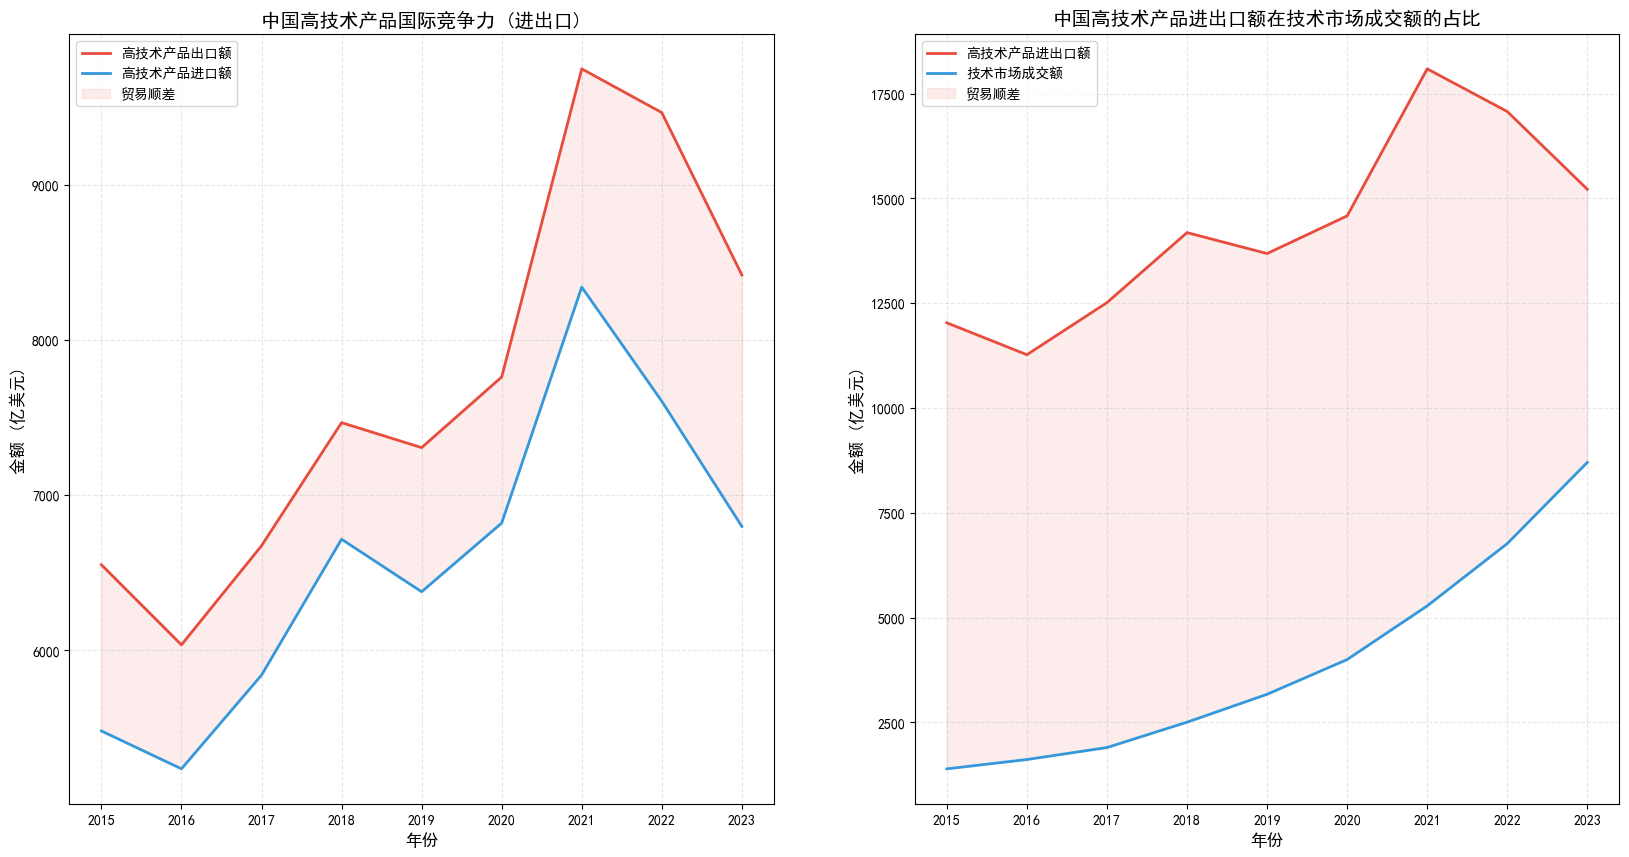

In [150]:
# ---数据组 A: 进出口贸易 ---
trade_indicators=[
    '高技术产品出口额(亿美元)',
    '高技术产品进口额(亿美元)',
    '高技术产品进出口额(亿美元)',
    '技术市场成交额(亿元)'
]


df_trade=get_time_series(df,trade_indicators)
#把亿元转化成亿美元
df_trade['技术市场成交额(亿美元)']=df_trade['技术市场成交额(亿元)']/7.0631

#--- 4 画图---
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

exports=df_trade['高技术产品出口额(亿美元)']
imports=df_trade['高技术产品进口额(亿美元)']

ax1.plot(years_input,exports,color='#E74C3C',linewidth=2,label="高技术产品出口额")
ax1.plot(years_input,imports,color='#3498DB',linewidth=2,label="高技术产品进口额")

#填充区域
ax1.fill_between(years_input,exports,imports,
                 where=(exports>=imports),
                 interpolate=True,#让填充区域更自然，不会出现断裂。
                 color='#E74C3C',alpha=0.1,label='贸易顺差'                       
)
ax1.set_title('中国高技术产品国际竞争力 (进出口)', fontsize=14, fontweight='bold')
ax1.set_ylabel('金额 (亿美元)', fontsize=12)
ax1.set_xlabel('年份', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.3)

#子图2
high_tech=df_trade['高技术产品进出口额(亿美元)']
tech_market=df_trade['技术市场成交额(亿美元)']

ax2.plot(years_input,high_tech,color='#E74C3C',linewidth=2,label="高技术产品进出口额")
ax2.plot(years_input[:-1],tech_market[:-1],color='#3498DB',linewidth=2,label="技术市场成交额")

#填充区域
ax2.fill_between(years_input,high_tech,tech_market,
                 where=(high_tech>=tech_market),
                 interpolate=True,#让填充区域更自然，不会出现断裂。
                 color='#E74C3C',alpha=0.1,label='贸易顺差'                       
)
ax2.set_title('中国高技术产品进出口额在技术市场成交额的占比', fontsize=14, fontweight='bold')
ax2.set_ylabel('金额 (亿美元)', fontsize=12)
ax2.set_xlabel('年份', fontsize=12)
ax2.legend(loc='upper left')
ax2.set_xticks(years_input[:-1])
ax2.grid(True, linestyle='--', alpha=0.3)
plt.show()